### Eigenvalue & Eigenvector with numpy

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(0)

testmatrix = np.array([[3,2],
                        [2,3]])

#Eigenvalue와 Eigenvector
print (lin.eig(testmatrix)) 

#Eigenvalue
print (lin.eig(testmatrix)[0])  
#Eigenvector
print (lin.eig(testmatrix)[1]) 

(array([5., 1.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [2]:
mat = lin.eig(testmatrix)[1]
print(mat[:,0])
print(mat[:,1])

[0.70710678 0.70710678]
[-0.70710678  0.70710678]


In [3]:
# e0'*e0 = 1 : 단위 벡터
print(mat[:,0].T.dot(mat[:,0]))
print(mat[:,1].T.dot(mat[:,1]))

0.9999999999999999
0.9999999999999999


In [4]:
# 대칭행렬의 성질
# e0'*e1 = 0 고유벡터간의 직교
print(mat[:,0].T.dot(mat[:,1]))

0.0


### PCA 간단예제

In [5]:
# 랜덤값 생성
x = np.random.randn(100)
x2 = 0.5*x + np.random.randn(100)*0.3
X = pd.DataFrame({'x1':x,'x2':x2})

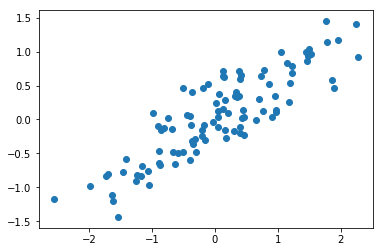

In [6]:
plt.scatter(X['x1'],X['x2'])

In [7]:
# 공분산행렬
mat = X.cov()
mat

,x1,x2
x1,1.026087,0.548351
x2,0.548351,0.389150


### 공분산행렬 선형변환

In [8]:
lin.eig(mat)

(array([1.34174117, 0.07349682]), array([[ 0.86666587, -0.49888903],
        [ 0.49888903,  0.86666587]]))

In [9]:
e1 = lin.eig(mat)[1][:,0]

In [10]:
e2 = lin.eig(mat)[1][:,1]

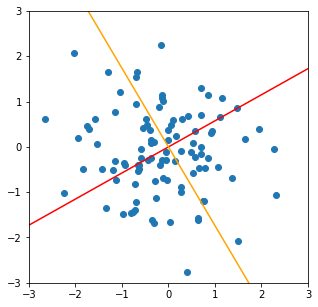

In [11]:
# 2차원 공간벡터
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
data = np.random.randn(200).reshape(100,2)
plt.scatter(data[:,0],data[:,1])
# 고유벡터 시각화
plt.plot([-4*e1[0],4*e1[0]],[-4*e1[1],4*e1[1]],c='red')
plt.plot([-4*e2[0],4*e2[0]],[-4*e2[1],4*e2[1]],c='orange')

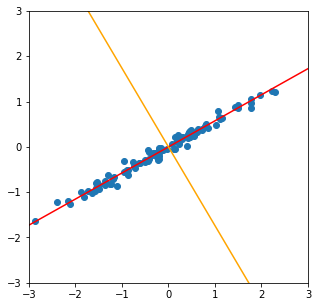

In [12]:
# 무작위 난수 100개 공분산행렬로 선형변환
data2 = data.dot(mat)
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(data2[:,0],data2[:,1])
# 고유벡터 시각화
plt.plot([-4*e1[0],4*e1[0]],[-4*e1[1],4*e1[1]],c='red')
plt.plot([-4*e2[0],4*e2[0]],[-4*e2[1],4*e2[1]],c='orange')

### 공분산행렬 스펙트럼 분해

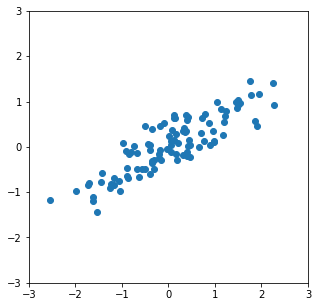

In [13]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2']);

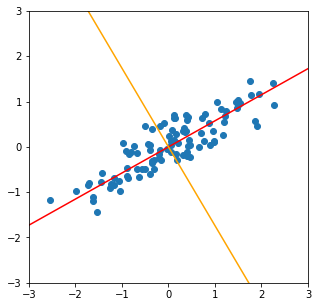

In [14]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 
plt.scatter(X['x1'],X['x2'])

# 고유벡터 시각화
plt.plot([-4*e1[0],4*e1[0]],[-4*e1[1],4*e1[1]],c='red')
plt.plot([-4*e2[0],4*e2[0]],[-4*e2[1],4*e2[1]],c='orange')

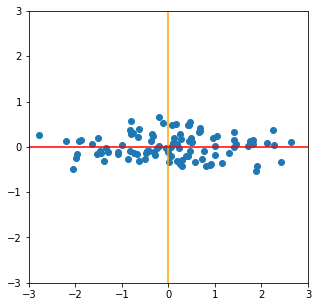

In [15]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 회전된 결과
PC1 = e1.dot(X.T)
# PC1 = e1[0]*X['x1'] + e1[1]*X['x2']
PC2 = e2.dot(X.T)
# PC2 = e2[0]*X['x1'] + e2[1]*X['x2']

plt.scatter(PC1,PC2);

plt.plot([0,0],[-3,3],c='orange');
plt.plot([-3,3],[0,0],c='red');

### sklearn PCA

In [16]:
from sklearn.decomposition import PCA

# 2개로 축소 
model = PCA(n_components=2)

# fit : component 생성
# transform : 변환후 반환
# fit_transform : fit과 transform 동시 적용

pca_features = model.fit_transform(X)

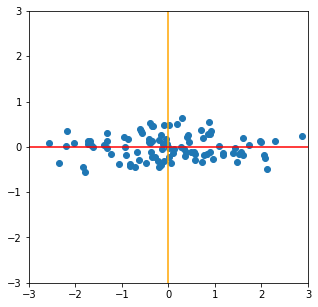

In [17]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

PC1 = pca_features[:,0]
PC2 = pca_features[:,1]

plt.scatter(PC1,PC2)

plt.plot([0,0],[-3,3],c='orange');
plt.plot([-3,3],[0,0],c='red');

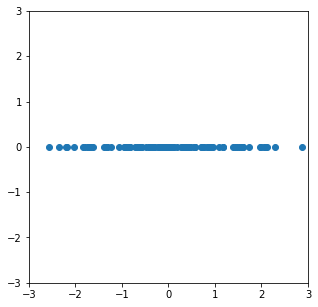

In [18]:
plt.figure(figsize=(5,5))
plt.xlim(-3, 3) 
plt.ylim(-3, 3) 

# 1개의 주성분만 표현
plt.scatter(PC1,len(PC1)*[0]);

# IRIS DATA

In [19]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
# 데이터 로드
iris = datasets.load_iris()

In [21]:
labels = np.array(iris.target)
data = pd.DataFrame(iris.data,columns=['Sepal length','Sepal width','Petal length','Petal width'])

In [22]:
data.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


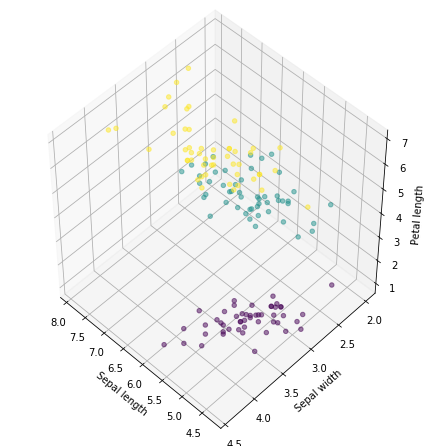

In [23]:
# 3차원
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(data['Sepal length'],data['Sepal width'],data['Petal length'],c=labels,alpha=0.5)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

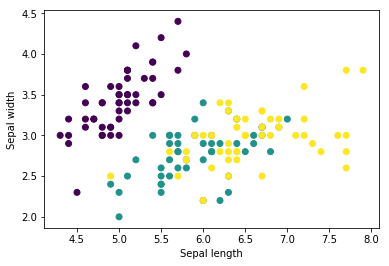

In [24]:
# 2차원
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(data['Sepal length'],data['Sepal width'],c=labels);
plt.show()

### PCA

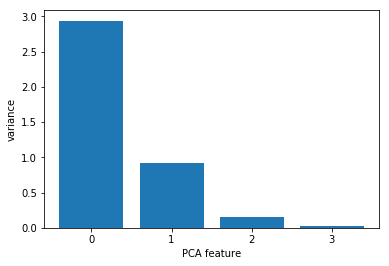

In [25]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# 정규화
scaler = StandardScaler()

# pca , 디폴트 components는 n(전체 feature 수)
pca = PCA()

# pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
# pipeline의 fit = 내장 전처리함수의 fit_transform 호출
pipeline.fit(data)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

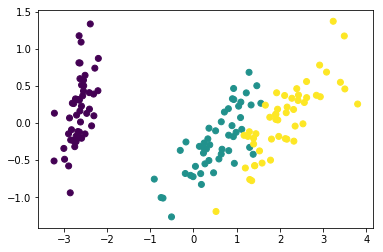

In [26]:
# 2차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=2)
pca_features = model.fit_transform(data)

pc1 = pca_features[:,0]
pc2 = pca_features[:,1]
plt.scatter(pc1,pc2,c=labels);
plt.show();

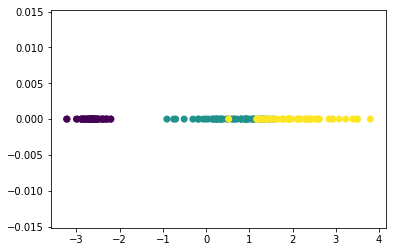

In [27]:
# 1차원
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

model = PCA(n_components=1)
pca_features = model.fit_transform(data)

pc1 = pca_features[:,0]
pc2 = len(pc1)*[0]
plt.scatter(pc1,pc2,c=labels);
plt.show();

### LDA

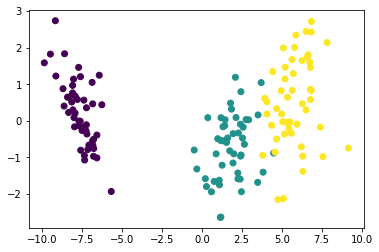

In [28]:
# 2차원
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

model = LinearDiscriminantAnalysis(n_components=2)
lda_features = model.fit_transform(data, labels)

lc1 = lda_features[:,0]
lc2 = lda_features[:,1]
plt.scatter(lc1,lc2,c=labels)
plt.show();

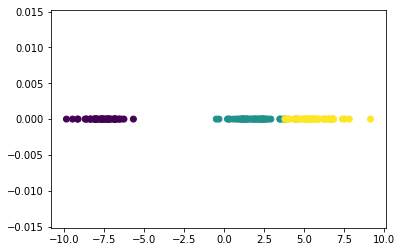

In [29]:
# 1차원
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

model = LinearDiscriminantAnalysis(n_components=1)
lda_features = model.fit_transform(data, labels)

lc1 = lda_features[:,0]
lc2 = len(lc1)*[0]
plt.scatter(lc1,lc2,c=labels)
plt.show();

### TSNE

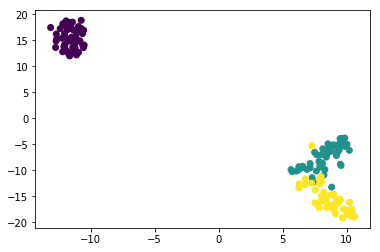

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100.0) #10.0~1000.0
transformed = model.fit_transform(data)

tc1 = transformed[:,0]
tc2 = transformed[:,1]
plt.scatter(tc1,tc2,c=labels)

plt.show()

# 학습할 수록 계속 변하므로 분석에 사용할 수는 없음, 시각화에 용이

# MNIST DATA

In [31]:
# 데이터 로드
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from scipy import io
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#서버 오류 -> 별도로 다운
#mnist = fetch_mldata("MNIST original")
#X = mnist.data / 255.0
#y = mnist.target

#7만개의 작은 숫자 이미지
#행 열이 반대로 되어있음 -> 전치
mnist = io.loadmat('mnist-original.mat') 
X = mnist['data'].T
y = mnist['label'].T

# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10

print (X.shape, y.shape)

(70000, 784) (70000, 1)


In [32]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


<Figure size 432x288 with 0 Axes>

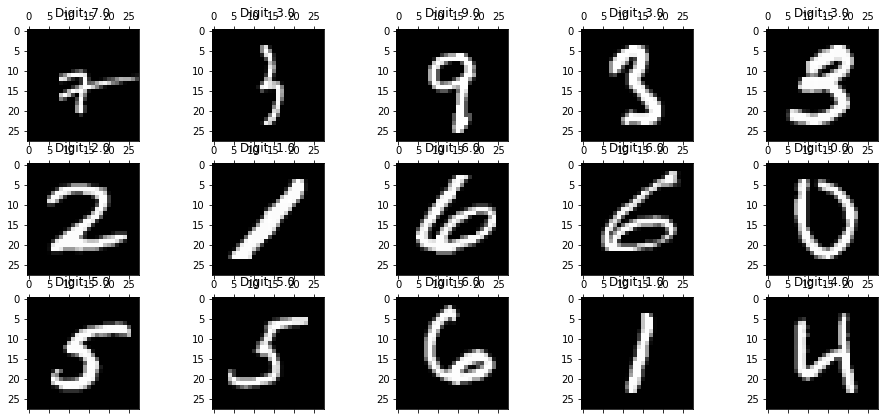

In [34]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### PCA

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


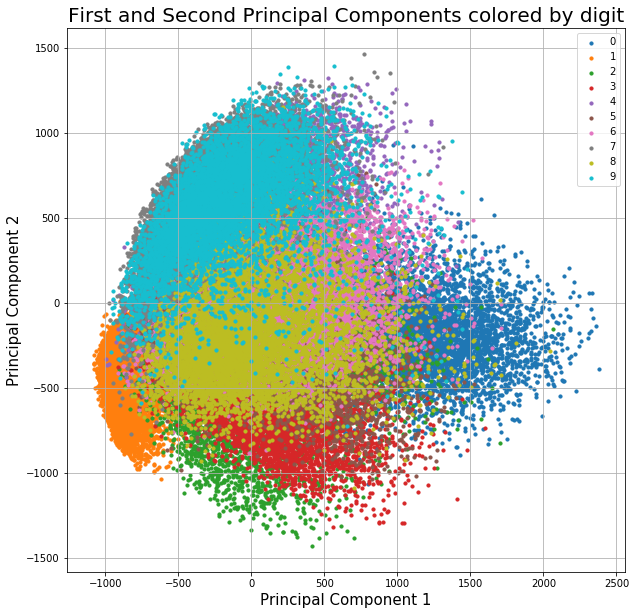

In [36]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('First and Second Principal Components colored by digit', fontsize = 20)

for i in range(10):
    ax.scatter(df['pca-one'][df['y']==i]
               , df['pca-two'][df['y']==i]
               , s = 10)

ax.legend(range(10))
ax.grid()

In [37]:
#10000개만
df1=df.loc[rndperm[:10000],:] 

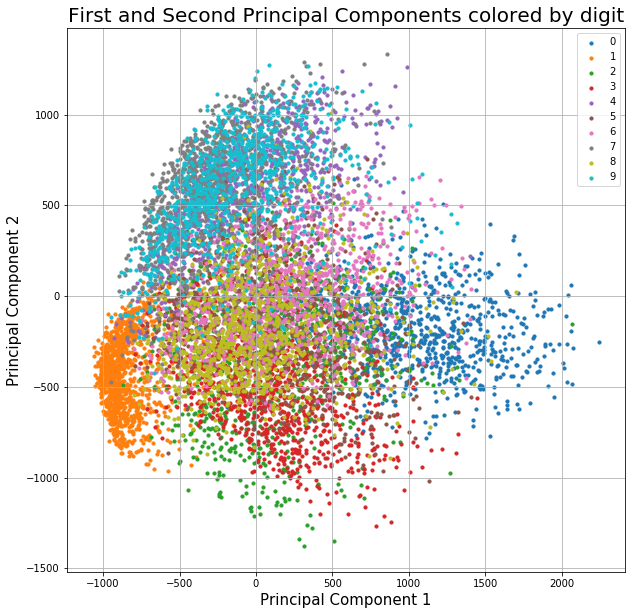

In [38]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('First and Second Principal Components colored by digit', fontsize = 20)

for i in range(10):
    ax.scatter(df1['pca-one'][df1['y']==i]
               , df1['pca-two'][df1['y']==i] 
               , s = 10)

ax.legend(range(10))
ax.grid()

In [39]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print( 'Cumulative explained variation for 50 principal components:',np.sum(pca_50.explained_variance_ratio_))

Cumulative explained variation for 50 principal components: 0.8253904322941764


### LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda_result = lda.fit_transform(df[feat_cols].values, df['y'])

C:\Users\cccb0\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


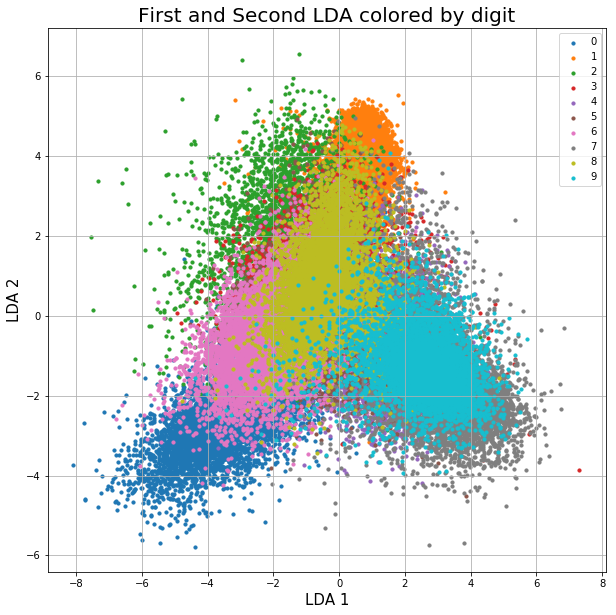

In [41]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('First and Second LDA colored by digit', fontsize = 20)

for i in range(10):
    ax.scatter(lda_result[df['y']==i,0]
            ,lda_result[df['y']==i,1]
            , s = 10)

ax.legend(range(10))
ax.grid()

In [42]:
#10000개만
df1=df.loc[rndperm[:10000],:] 

In [43]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_result1 = lda.fit_transform(df1[feat_cols].values, df1['y'])

C:\Users\cccb0\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


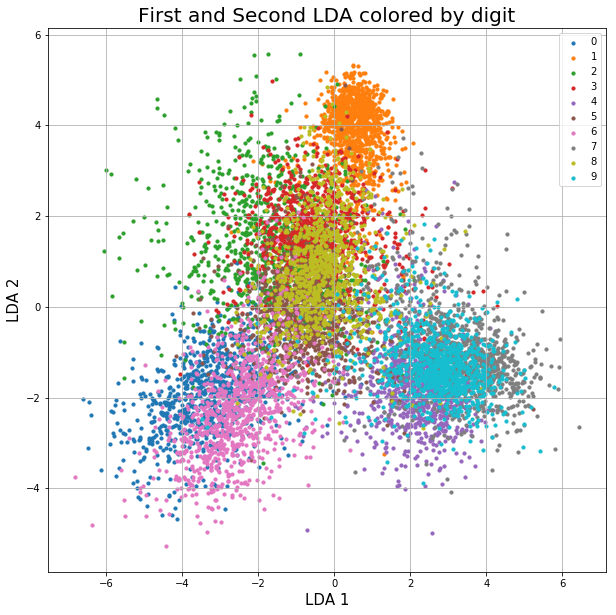

In [44]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('First and Second LDA colored by digit', fontsize = 20)

for i in range(10):
    ax.scatter(lda_result1[df1['y']==i,0]
            ,lda_result1[df1['y']==i,1]
            , s = 10)

ax.legend(range(10))
ax.grid()

### TSNE

In [45]:
#10000개만
df1=df.loc[rndperm[:10000],:] 

In [46]:
import time
from sklearn.manifold import TSNE

time_start = time.time()

tsne = TSNE(n_components=2, perplexity=40, n_iter=300) # 10000개 데이터를 2차원으로
tsne_results = tsne.fit_transform(df1[feat_cols].values)

print( 't-SNE done! Time elapsed: {} seconds',time.time() - time_start )

t-SNE done! Time elapsed: {} seconds 395.34728717803955


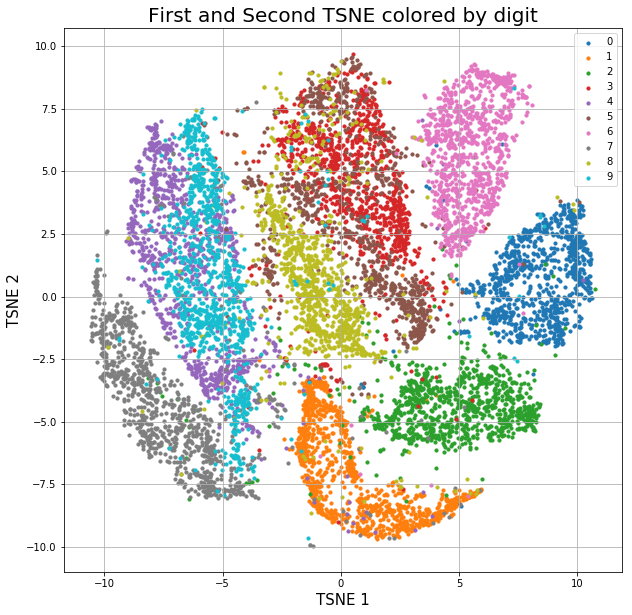

In [47]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE 1', fontsize = 15)
ax.set_ylabel('TSNE 2', fontsize = 15)
ax.set_title('First and Second TSNE colored by digit', fontsize = 20)

for i in range(10):
    ax.scatter(tsne_results[df1['y']==i,0]
            ,tsne_results[df1['y']==i,1]
            , s = 10)

ax.legend(range(10))
ax.grid()

# 고차원을 저차원으로 임베딩 시킬때 군집간의 거리를 유지하므로 잘 분류된 상태

## Train & Test data

In [36]:
# test set을 transform 할때는 train의 fit으로 !
pca_a = PCA()

pca_a.fit(X_train)
X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test)

NameError: name 'X_train' is not defined